## Neural Network
- A neural network is a machine learning program, or model, that makes decisions in a manner similar to the human brain, by using processes that mimic the way biological neurons work together to identify phenomena, weigh options and arrive at conclusions.
- It is a stack of layers where each layers consists of some predefined math and internal variables.


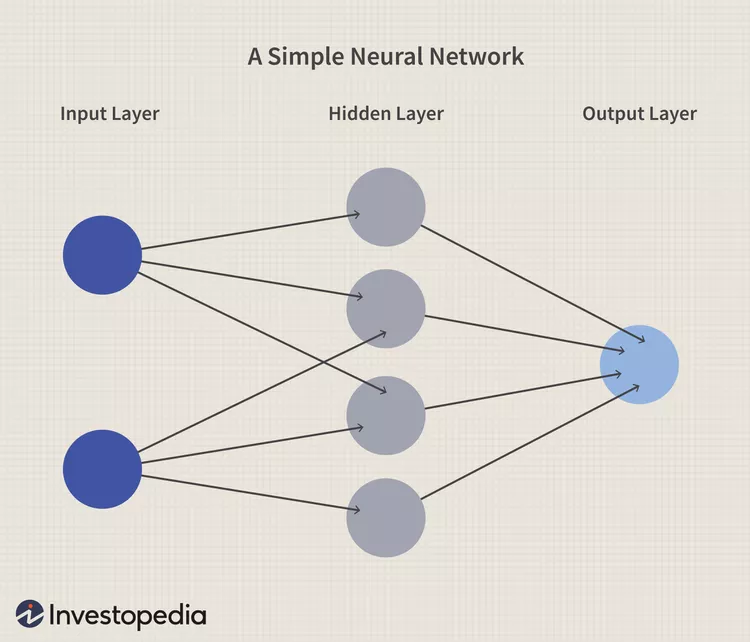

### How do neural networks work?

Once an input layer is determined, weights are assigned. These weights help determine the importance of any given variable, with larger ones contributing more significantly to the output compared to other inputs. All inputs are then multiplied by their respective weights and then summed. Afterward, the output is passed through an activation function, which determines the output. If that output exceeds a given threshold, it “fires” (or activates) the node, passing data to the next layer in the network. This results in the output of one node becoming in the input of the next node. This process of passing data from one layer to the next layer defines this neural network as a feedforward network.

Let’s break down what one single node might look like using binary values. We can apply this concept to a more tangible example, like whether you should go surfing (Yes: 1, No: 0). The decision to go or not to go is our predicted outcome, or y-hat. Let’s assume that there are three factors influencing your decision-making:

    Are the waves good? (Yes: 1, No: 0)
    Is the line-up empty? (Yes: 1, No: 0)
    Has there been a recent shark attack? (Yes: 0, No: 1)

In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np



In [63]:
(x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [64]:
len(x_train)

60000

In [65]:
len(x_test)

10000

In [66]:
x_train[0].shape

(28, 28)

In [67]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

This is our first index in the form of 2-dim array.

let's visualize what it actually is

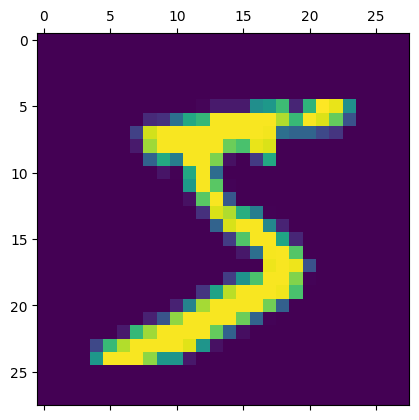

In [68]:
plt.matshow(x_train[0])

Visual representations shows us it is 5

Let's prove it by using y_train which is the output

In [69]:
y_train[0]

5

In [70]:
x_train.shape

(60000, 28, 28)

Where

60000: This is the number of samples or images in the dataset. In other words, there are 60,000 individual images.

28: This represents the height of each image in pixels.

Another 28: This represents the width of each image in pixels.

In [71]:
X_train = x_train / 255
X_test = y_test / 255

In [72]:
# flatten reduce the dimension
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)



In [73]:
x_train_flatten.shape

(60000, 784)

In [74]:
x_test_flatten.shape

(10000, 784)

In [75]:
x_test_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Very simple neural network with no hidden layers


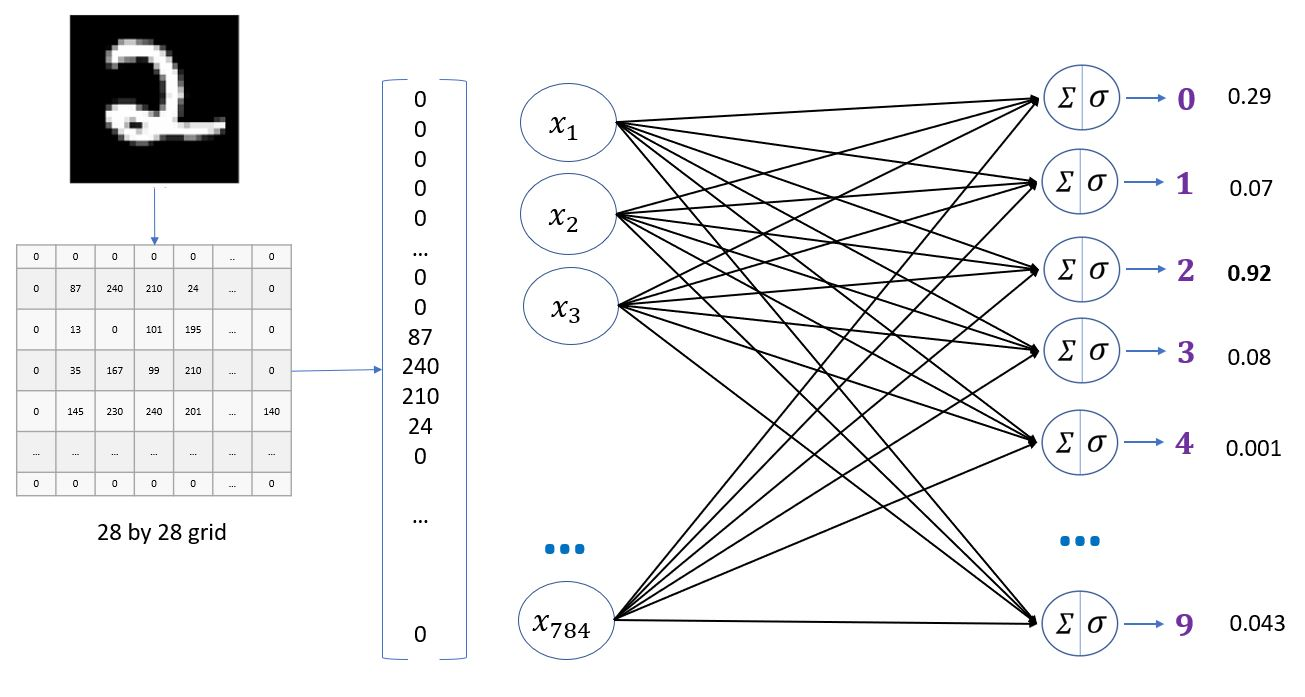

In [87]:
# Sequential means stack of layers

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7611 - loss: 20.5205
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.8785 - loss: 6.0192
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.8819 - loss: 5.5889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.8866 - loss: 5.3238
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.8913 - loss: 4.9707


In [88]:
# Evaluate the model

model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.8488 - loss: 8.0088


[7.098220348358154, 0.866599977016449]

In [89]:
y_pred = model.predict(x_test_flatten)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.99999994, 0.        , 0.        ],
      dtype=float32)

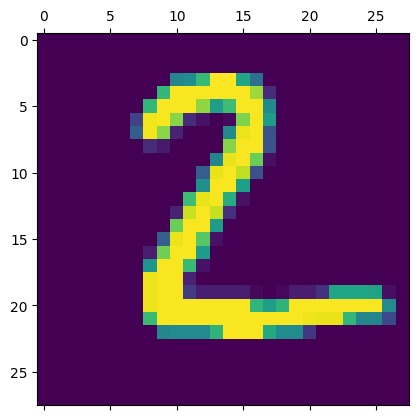

In [90]:
plt.matshow(x_test[1])

In [91]:
# np.argmax finds a maximum element from an array and returns the index of it

np.argmax(y_pred[1])

2

In [92]:
# first five prediction

y_predict_label = [np.argmax(i) for i in y_pred]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [93]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [94]:
# Confusion Matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    3,    4,    0,    2,    2,    2,    3,    2],
       [   0, 1114,    3,    7,    0,    1,    5,    1,    2,    2],
       [   8,    7,  952,   16,    5,    1,   13,    9,   14,    7],
       [   3,    1,   21,  919,    0,   19,    4,   12,    7,   24],
       [   1,    2,    9,    4,  644,    0,   17,    9,    4,  292],
       [  15,    9,   10,   71,   11,  674,   20,   11,   36,   35],
       [  16,    3,   17,    1,    2,    7,  910,    1,    0,    1],
       [   1,   10,   17,    8,    2,    0,    0,  915,    0,   75],
       [   8,   24,   63,   66,    8,   27,   21,   13,  608,  136],
       [   8,    3,    2,   11,    4,    3,    0,    8,    2,  968]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

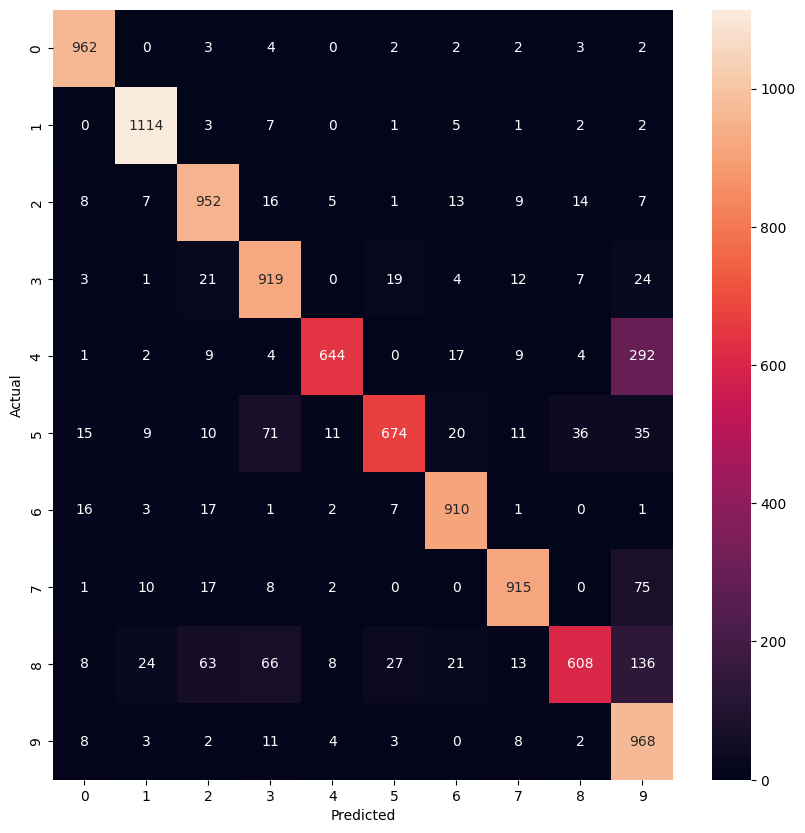

In [95]:
# Let's visualize
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [104]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7749 - loss: 0.8150
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8899 - loss: 0.3864
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8995 - loss: 0.3431
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9064 - loss: 0.3138
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9110 - loss: 0.3029


In [105]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.8942 - loss: 0.3437


[0.30166202783584595, 0.9089000225067139]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

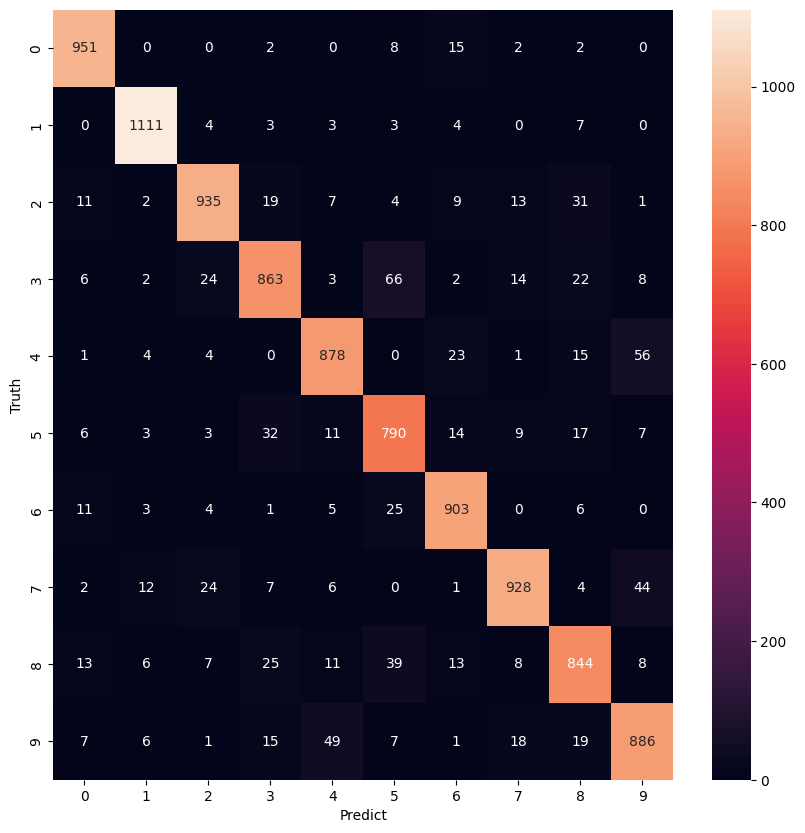

In [106]:
y_pred = model.predict(x_test_flatten)
y_predict_label = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_label)


plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predict')
plt.ylabel('Truth')

In [107]:
# Using Flatten layer so that we don't have to call .reshape on input dataset


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5


/home/jagannath/100OfCode/env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7769 - loss: 0.8359
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8916 - loss: 0.3789
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9019 - loss: 0.3322
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9036 - loss: 0.3215
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9116 - loss: 0.2913
